In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [2]:
#from sklearn.datasets import fetch_openml #scikit-learn
#mnist = fetch_openml('mnist_784', version=1, as_frame=False)

In [3]:
#mnist

In [4]:
#type(mnist)

In [5]:
from sklearn.utils import Bunch

In [6]:
dico = dict(apple = 20, apricot = 15, peach = 0)

In [7]:
dico

{'apple': 20, 'apricot': 15, 'peach': 0}

In [8]:
dico['apple']

20

In [9]:
 # dico2.apple # does not work

In [10]:
bunch = Bunch(apple = 20, apricot = 15, peach = 0)

In [11]:
bunch

{'apple': 20, 'apricot': 15, 'peach': 0}

In [12]:
bunch['apple']

20

In [13]:
bunch.apple

20

In [14]:
#mnist.keys()

NameError: name 'mnist' is not defined

In [ ]:
#print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [ ]:
#X = mnist.data

In [ ]:
#X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
#X.shape

(70000, 784)

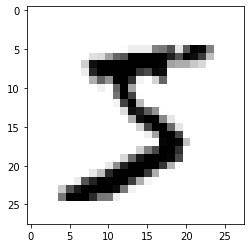

In [ ]:
plt.imshow(X[0].reshape([28,28]), cmap='binary')
plt.show()

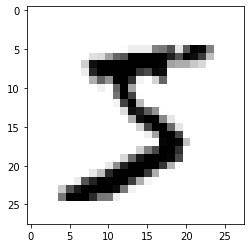

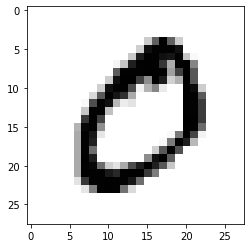

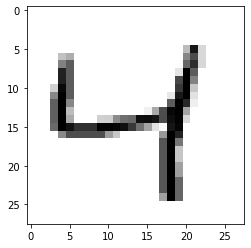

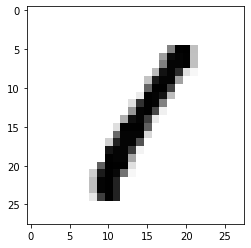

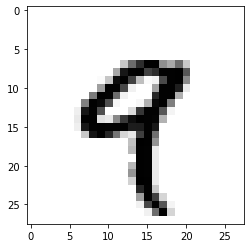

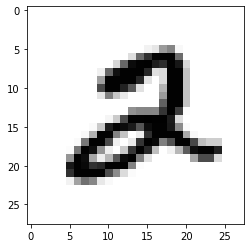

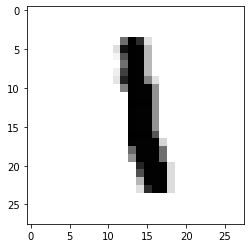

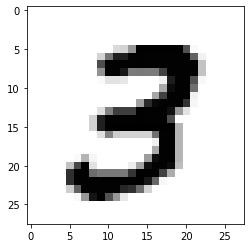

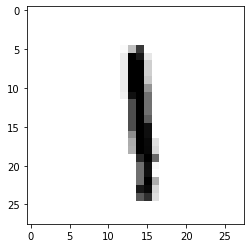

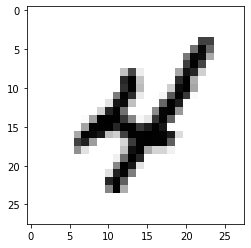

In [ ]:
for i in range(10):
    plt.imshow(np.reshape(X[i], (28,28)), cmap='binary')
    plt.show()

In [ ]:
y = mnist.target
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [ ]:
y.shape

(70000,)

In [ ]:
y = y.astype('uint8')
y

array([5, 0, 4, ..., 4, 5, 6], dtype=uint8)

In [ ]:
X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]

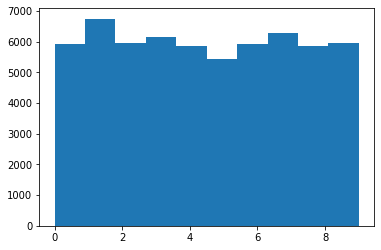

In [ ]:
plt.hist(y_train, bins = 10)
plt.show()

In [ ]:
y_is_two_train = (y_train == 2)
y_is_two_test = (y_test == 2)

In [ ]:
np.mean(y_is_two_train)

0.0993

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:

log_clf = LogisticRegression()
log_clf.fit(X_train, y_is_two_train)

CPU times: user 19 s, sys: 656 ms, total: 19.7 s
Wall time: 5.32 s


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
log_clf.n_iter_

array([100], dtype=int32)

In [ ]:
log_clf = LogisticRegression(max_iter = 500)
log_clf.fit(X_train, y_is_two_train)

CPU times: user 1min 30s, sys: 2.76 s, total: 1min 33s
Wall time: 24.2 s


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500)

In [ ]:
log_clf.n_iter_

array([500], dtype=int32)

YOU MUST RESCALE THE DATA

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()
sc.fit(X_train)
X_train_reduced = sc.transform(X_train)
#X_train_reduced = sc.fit_transform(X_train)

In [ ]:
log_clf = LogisticRegression(max_iter=500) #logistique reg does not implies logist regress

In [ ]:
log_clf.fit(X_train_reduced, y_is_two_train)

LogisticRegression(max_iter=500)

In [ ]:
log_clf.n_iter_

array([397], dtype=int32)

In [ ]:
log_clf.intercept_, log_clf.coef_

(array([-7.54338787]),
 array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         -6.22483484e-03,  3.67992563e-03,  1.44971039e-02,
          1.44971039e-02,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00, -1.15741110e-03,
         -1.88474329e-03, -4.22746779e-02, -8.76487040e-03,
          1.06940827e-02, -2.45756712e-02, -7.60289959e-03,
          3.16354213e-02, -7.72389814e-02, -7.21835173e-02,
          2.10211517e-02, -3.43035135e-02,  5.62612732e-02,
         -4.27939542e-02, -7.33012461e-04, -2.01737429e-01,
         -3.27056

In [ ]:
log_clf.predict(X_train_reduced)[0:20]

array([False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False])

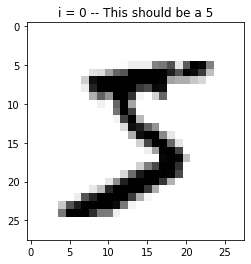

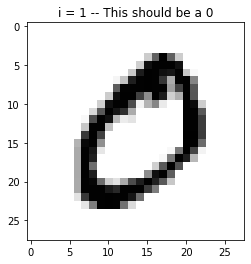

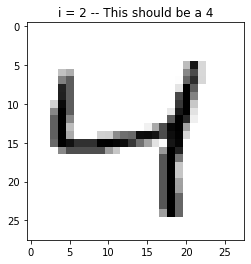

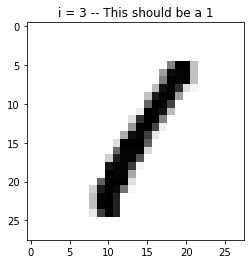

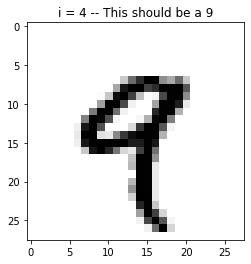

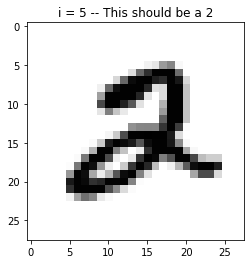

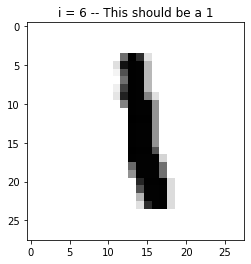

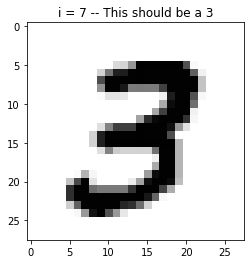

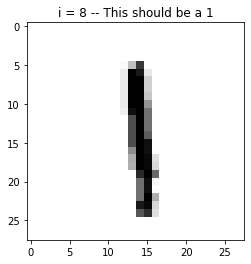

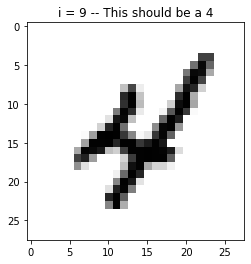

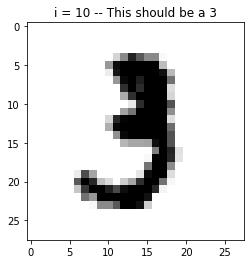

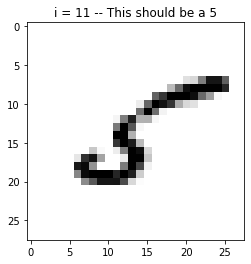

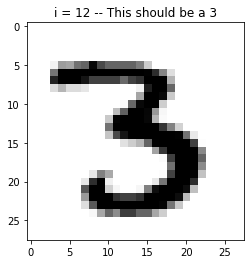

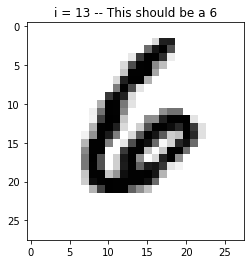

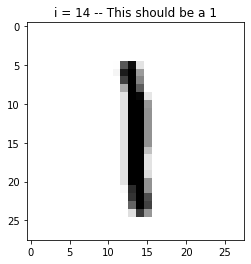

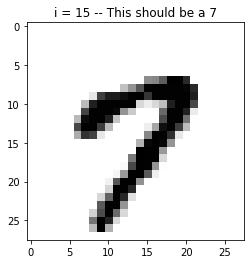

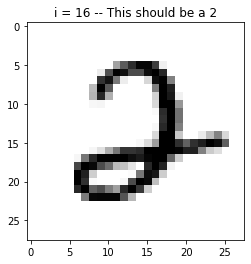

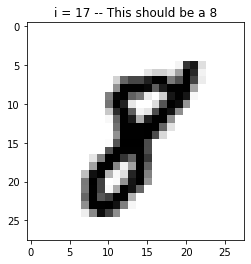

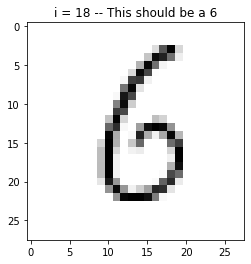

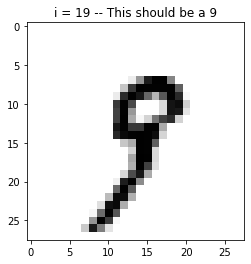

In [ ]:
for i in range(20):
    plt.imshow(X[i].reshape([28,28]), cmap ='binary')
    plt.title('i = %d -- This should be a %d'%(i,y[i]))
    plt.show()

In [ ]:
#à voir Matrice de confusion 
#accuracy = (TN + TP)/(TN+TP+FP+FN) 
#recall = (TP)/(TP+FN)
#precision = (TP)/(TP+FP)
#Harmonic mean = F1score = (2)/((1/Recall)+ (1/precision))
#Il y a tout sur sklearn à cherche === 
# from sklearn.metrics import confusion_matrix, precision_score,recall_score,f1_score, accuracy_score

In [ ]:
def performance(y_real,y_predicted):
    print('The confusion matrix is:')
    print(confusion_matrix(y_real,y_predicted))
    metrics ={'Accuracy':accuracy_score, 'F1':f1_score, 'Recall':recall_score,'Precision':precision_score, 'Confusion Matrix':confusion_matrix}
    for metric, func in metrics.items():
 #i dont use my model pn the test set , i first 

In [ ]:
y_is_two_train_predicted = log_clf.predict(X_train_reduced)
performance(y_is_two_train, y_is_two_train_predicted)

In [ ]:
 #i dont use my model pn the test set , i first transform jsais pas quoi 
y_is_two_train_predicted = log_clf.predict(sc.transform(X_test))
performance(y_is_two_test, y_is_two_train_predicted)

#scaling, fit le stansdat scaling,transofrm @
#classifer, fit , predict

In [ ]:
wrong = np.argwhere(y_is_two_test != )